In [1]:
!pip install nltk
!pip install lxml
!pip install gensim

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
urllib.request.urlretrieve("https://hyds-dlma-2025-1.s3.ap-northeast-2.amazonaws.com/prac1/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f14e0fbce10>)

In [5]:
# Open the XML file in read mode with UTF-8 encoding.
targetXML = open('ted_en-20160408.xml', 'r',encoding='UTF8')
target_text = etree.parse(targetXML)
# Extract the content between <content> and </content> tags from the XML file.

parse_text = '\n'.join(target_text.xpath('//content/text()'))
                                         
# Remove background sounds such as (Audio), (Laughter), etc., appearing within the content
# using the sub module of the regular expression.
# This code removes text enclosed in parentheses.

content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [6]:
# Perform sentence tokenization on the input corpus using NLTK.
sent_text = sent_tokenize(content_text)
# For each sentence, remove punctuation and convert uppercase letters to lowercase.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
# Perform word tokenization on each sentence using NLTK.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
print(f'Total Sample : {len(result)}')

Total Sample : 273424


In [8]:
# Print 3 samples
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = Word2Vec(sentences=result, vector_size=300, window=5, min_count=5, workers=4, sg=0) #changed vector size from 100 to 300

In [10]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8458113074302673), ('guy', 0.8059267401695251), ('lady', 0.7695033550262451), ('boy', 0.7542091012001038), ('girl', 0.7389757633209229), ('gentleman', 0.7199087738990784), ('kid', 0.6935365200042725), ('soldier', 0.6804335117340088), ('friend', 0.6481655836105347), ('poet', 0.6439332962036133)]


In [11]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8458113074302673), ('guy', 0.8059267401695251), ('lady', 0.7695033550262451), ('boy', 0.7542091012001038), ('girl', 0.7389757633209229), ('gentleman', 0.7199087738990784), ('kid', 0.6935365200042725), ('soldier', 0.6804335117340088), ('friend', 0.6481655836105347), ('poet', 0.6439332962036133)]


In [12]:
import gensim
import urllib.request
urllib.request.urlretrieve("https://hyds-dlma-2025-1.s3.ap-northeast-2.amazonaws.com/prac1/GoogleNews-vectors-negative300.bin.gz", 
                           filename="GoogleNews-vectors-negative300.bin.gz")

('GoogleNews-vectors-negative300.bin.gz',
 <http.client.HTTPMessage at 0x7f14c2104990>)

In [13]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

In [14]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [15]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))
print(word2vec_model.similarity('hi', 'hello'))

0.40797037
0.057204384
0.65489846


In [16]:
!pip install -U scikit-learn
!pip install -U matplotlib
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [17]:
# Step 1: Select 20 words (ensure they exist in both models)
words = ['man', 'woman', 'king', 'queen', 'apple', 'orange', 'car', 'bus', 'book', 'pen',
         'dog', 'cat', 'happy', 'sad', 'run', 'walk', 'big', 'small', 'fast', 'slow']

In [18]:
# Step 2: Extract word vectors from both models
trained_vectors = []
pretrained_vectors = []

In [19]:
for word in words:
    if word in model.wv and word in word2vec_model:
        trained_vectors.append(model.wv[word])  # From your trained model
        pretrained_vectors.append(word2vec_model[word])  # From Google News model

# Combine vectors for t-SNE
combined_vectors = np.vstack([trained_vectors, pretrained_vectors])

In [20]:
# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(combined_vectors)

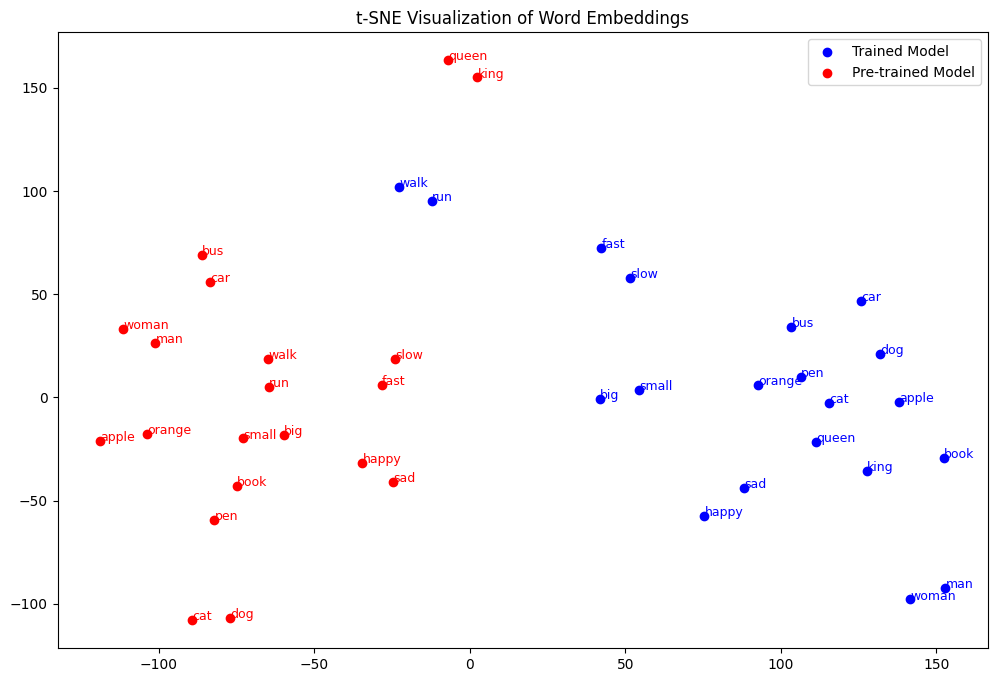

In [21]:
# Step 4: Visualize the results
plt.figure(figsize=(12, 8))

# Plot trained model vectors
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue', label='Trained Model' if i == 0 else "")
    plt.text(reduced_vectors[i, 0] + 0.1, reduced_vectors[i, 1], word, fontsize=9, color='blue')

# Plot pre-trained model vectors
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i + len(words), 0], reduced_vectors[i + len(words), 1], color='red', label='Pre-trained Model' if i == 0 else "")
    plt.text(reduced_vectors[i + len(words), 0] + 0.1, reduced_vectors[i + len(words), 1], word, fontsize=9, color='red')

plt.title("t-SNE Visualization of Word Embeddings")
plt.legend()
plt.show()